# Energy data analysis

### This projects takes the energy information from BP statistical review

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information: the ones used for this project is:

##### Oil Production - Tonnes
##### Gas Production - Mtoe
##### Coal Production - Mtoe
##### Nuclear Generation - TWh
##### Hydro Generation - TWh
##### Solar Generation - TWh displays the solar generation in TWh from 1965 til 2018
##### Wind Generation - TWh displays the wind generation in TWh from 1965 til 2018
##### Geo Biomass Other - TWh displays the geo+biomass+other generation in TWh from 1965 til 2018
##### Biofuels Production - Ktoe***
##### Carbon Dioxide Emissions displays the carbon emission in Million tonnes from 1965 til 2018

### 1. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('libraries imported')

libraries imported


### 2. Take all places, countries and regions

In [2]:
#Take the Places
Places = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Primary Energy Consumption', skiprows = 2)
Places.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Places.set_index('Countries', inplace=True)
Places = Places.iloc[:Places.index.get_loc('Total World')]
Places.dropna(how='all', axis=0, inplace=True)
Places = Places.index
Places

Index(['Canada', 'Mexico', 'US', 'Total North America', 'Argentina', 'Brazil',
       'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago',
       'Venezuela', 'Central America', 'Other Caribbean',
       'Other South America', 'Total S. & Cent. America', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Other Europe', 'Total Europe',
       'Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation',
       'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS', 'Total CIS', 'Iran',
       'Iraq', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Other Middle East', 'Total

In [46]:
#Take the countries
Countries = Places[~Places.str.startswith('Total')].sort_values()
display(Countries)

Index(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Central America', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia',
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Eastern Africa',
       'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia',
       'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa',
       'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway',
       'Oman', 'Other Asia Pacific', 'Other CIS', 'Other Caribbean',
       'Other Europe', 'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
       'Russian Federation', 'Saudi Arabia', 'Si

In [ ]:
#Take the regions
Regions = Places[Places.str.startswith('Total')]
Regions

### 2. Import energy data

In [5]:
#Import the Oil production data
Oil = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Oil Production - Tonnes', skiprows = 2)
Oil.rename(columns={'Million tonnes':'Countries'}, inplace =True)
Oil.set_index('Countries', inplace=True)
Oil.dropna(how='all', axis=0, inplace=True)
Oil.dropna(how='all', axis=1, inplace=True)
Oil.fillna(0, inplace=True)
Oil = Oil.iloc[:Oil.index.get_loc('Total World'),:Oil.columns.get_loc(2018)+1]
#display(Oil)

In [6]:
#Import the Gas production data
Gas = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Gas Production - Mtoe', skiprows = 2)
Gas.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Gas.set_index('Countries', inplace=True)
Gas.dropna(how='all', axis=0, inplace=True)
Gas.dropna(how='all', axis=1, inplace=True)
Gas.fillna(0, inplace=True)
Gas = Gas.iloc[:Gas.index.get_loc('Total World'),:Gas.columns.get_loc(2018)+1]
#display(Gas)

In [7]:
#Import Coal Production data 
Coal = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Coal Production - Mtoe', skiprows = 2)
Coal.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Coal.set_index('Countries', inplace=True)
Coal.dropna(how='all', axis=0, inplace=True)
Coal.dropna(how='all', axis=1, inplace=True)
Coal.fillna(0, inplace=True)
Coal = Coal.iloc[:Coal.index.get_loc('Total World'),:Coal.columns.get_loc(2018)+1]
#display(Coal)

In [8]:
#Import the nuclear generation
Nuclear = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Nuclear Generation - TWh', skiprows = 2)
Nuclear.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Nuclear.set_index('Countries', inplace=True)
Nuclear.dropna(how='all', axis=0, inplace=True)
Nuclear.dropna(how='all', axis=1, inplace=True)
Nuclear.fillna(0, inplace=True)
Nuclear = Nuclear.iloc[:Nuclear.index.get_loc('Total World'),:Nuclear.columns.get_loc(2018)+1]
#display(Nuclear)

In [9]:
#Import the hydro generation data
Hydro = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Hydro Generation - TWh', skiprows = 2)
Hydro.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Hydro.set_index('Countries', inplace=True)
Hydro.dropna(how='all', axis=0, inplace=True)
Hydro.dropna(how='all', axis=1, inplace=True)
Hydro.fillna(0, inplace=True)
Hydro = Hydro.iloc[:Hydro.index.get_loc('Total World'),:Hydro.columns.get_loc(2018)+1]
#display(Solar)

In [10]:
#Import the solar generation data
Solar = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', skiprows = 2)
Solar.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Solar.set_index('Countries', inplace=True)
Solar.dropna(how='all', axis=0, inplace=True)
Solar.dropna(how='all', axis=1, inplace=True)
Solar.fillna(0, inplace=True)
Solar = Solar.iloc[:Solar.index.get_loc('Total World'),:Solar.columns.get_loc(2018)+1]
#display(Solar)

In [11]:
#Import the Wind energy generation data
Wind = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Wind Generation - TWh ', skiprows=2)
Wind.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Wind.set_index('Countries', inplace=True)
Wind.dropna(how='all', axis=0, inplace=True)
Wind.dropna(how='all', axis=1, inplace=True)
Wind.fillna(0,inplace=True)
Wind = Wind.iloc[:Wind.index.get_loc('Total World'),:Wind.columns.get_loc(2018)+1]
#display(Wind)

In [12]:
#Import the Other energy generation data
Other = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Geo Biomass Other - TWh', skiprows = 2)
Other.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Other.set_index('Countries', inplace=True)
Other.dropna(how='all', axis=0, inplace=True)
Other.dropna(how='all', axis=1, inplace=True)
Other.fillna(0, inplace=True)
Other = Other.iloc[:Other.index.get_loc('Total World'),:Other.columns.get_loc(2018)+1]
#display(Other)

In [89]:
#Import the Carbon Dioxe data
Carbon = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Carbon Dioxide Emissions', skiprows = 2)
Carbon.rename(columns={'Million tonnes of carbon dioxide':'Countries'}, inplace =True)
Carbon.set_index('Countries', inplace=True)
Carbon.dropna(how='all', axis=0, inplace=True)
Carbon.dropna(how='all', axis=1, inplace=True)
Carbon.fillna(0, inplace=True)
Carbon = Carbon.iloc[:Carbon.index.get_loc('Total World'),:Carbon.columns.get_loc(2018)+1]
#display(Carbon)

### 3. Create energy data variables

In [146]:
Energy_type = [Oil, Gas, Coal, Nuclear, Hydro, Solar, Wind, Other, Carbon]
energy = ["Oil","Gas","Coal","Nuclear","Hydro","Solar", "Wind", "Other", "Carbon"]

# Create a dict to correlate the Energy with specific color
color = ['blue', 'orange', 'green', 'red','purple', 'brown', 'cyan', 'gray', 'olive']
dicts = {}
for i in range(0,len(energy)):
    dicts[energy[i]] = color[i]


### 4. Take the countries by region

In [ ]:
# Countries in Total North America
Total_North = Places[:Places.get_loc('Total North America')+1]
Total_North

In [ ]:
# Countries in Total S. & Cent. America
Total_S_Cent = Places[Places.get_loc('Total North America')+1:Places.get_loc('Total S. & Cent. America')+1]
Total_S_Cent

In [ ]:
# Countries in Total Europe
Total_S_Cent = Places[Places.get_loc('Total S. & Cent. America')+1:Places.get_loc('Total Europe')+1]
Total_S_Cent

In [ ]:
# Countries in Total CIS
Total_S_Cent = Places[Places.get_loc('Total Europe')+1:Places.get_loc('Total CIS')+1]
Total_S_Cent

In [ ]:
# Countries in Total Middle East
Total_S_Cent = Places[Places.get_loc('Total CIS')+1:Places.get_loc('Total Middle East')+1]
Total_S_Cent

In [ ]:
# Countries in Total Africa
Total_S_Cent = Places[Places.get_loc('Total Middle East')+1:Places.get_loc('Total Africa')+1]
Total_S_Cent

In [139]:
# Countries in Total Asia Pacific
Total_S_Cent = Places[Places.get_loc('Total Africa')+1:Places.get_loc('Total Asia Pacific')+1]
Total_S_Cent

Index(['Australia', 'Bangladesh', 'China', 'China Hong Kong SAR', 'India',
       'Indonesia', 'Japan', 'Malaysia', 'New Zealand', 'Pakistan',
       'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan',
       'Thailand', 'Vietnam', 'Other Asia Pacific', 'Total Asia Pacific'],
      dtype='object', name='Countries')

### 5. Correlation table

In [107]:
# Create the correlation table for all the countries
a = pd.DataFrame([])
m=0
for j in Countries:
    type_energy = []
    n=0
    Table = []
    for i in Energy_type:
        try:
            Table.append(i.loc[j])
            type_energy.append(energy[n])
        except KeyError:
            print(f"{j} don't have information of {energy[n]}")

        n+=1

    Table=pd.DataFrame(Table)
    Table.index=type_energy
    Table = Table[(Table.T != 0).any()]
    Table=Table.transpose()
    x = Table.corr()
    x = x.tail(1)
    x.replace({1.0:j}, inplace=True)
    a = a.append(x)
    m+=1


Algeria don't have information of Coal
Argentina don't have information of Coal
Austria don't have information of Oil
Austria don't have information of Gas
Austria don't have information of Coal
Azerbaijan don't have information of Coal
Bangladesh don't have information of Oil
Bangladesh don't have information of Coal
Belarus don't have information of Oil
Belarus don't have information of Gas
Belarus don't have information of Coal
Belgium don't have information of Oil
Belgium don't have information of Gas
Belgium don't have information of Coal
Bulgaria don't have information of Oil
Bulgaria don't have information of Gas
Central America don't have information of Oil
Central America don't have information of Gas
Central America don't have information of Coal
Chile don't have information of Oil
Chile don't have information of Gas
Chile don't have information of Coal
China Hong Kong SAR don't have information of Oil
China Hong Kong SAR don't have information of Gas
China Hong Kong SAR don'

In [108]:
# Set the correlation with Carbon for each countrie
a.rename(columns={'Carbon':'Countries'}, inplace =True)
a.set_index('Countries', inplace=True)
display(a)

,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,
Algeria,NaN,0.84299,-0.549425,NaN,0.699166,NaN,0.50525,0.53159
Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Australia,0.949359,0.814699,0.69996,NaN,0.477021,0.848147,0.481691,0.629848
Austria,NaN,NaN,0.680002,NaN,NaN,0.595616,0.141636,0.338333
Azerbaijan,NaN,0.686373,0.682382,NaN,0.510038,0.183724,0.13945,0.111736
...,...,...,...,...,...,...,...,...
United Kingdom,0.64374,-0.195668,-0.677552,-0.64236,-0.396994,-0.823511,-0.692446,-0.777072
Uzbekistan,0.430912,0.971524,0.969875,NaN,0.848521,NaN,NaN,NaN
Venezuela,0.306778,0.90966,0.961592,NaN,-0.166928,NaN,0.435175,0.174111


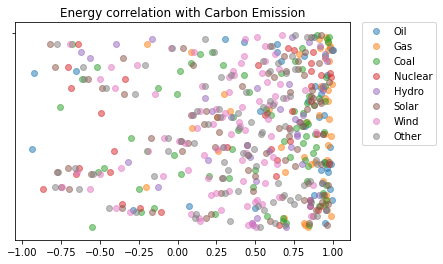

In [154]:
for i in range(0,len(a.columns)):
    plt.scatter(a.iloc[:,i],a.index, alpha=0.5)
    plt.legend(energy,bbox_to_anchor=(1.02,1.025), loc="upper left")
    plt.yticks('')
    plt.title('Energy correlation with Carbon Emission')